## Evaluación del Modelo 

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('../data/data.csv')
df['diferencia_goles'] = df['goles_local'] - df['goles_visitante']

# Dividir el DataFrame en características (X) y objetivo (y)
X = df[['posesion_local (%)', 'tiros_arco_local']]
y = df['diferencia_goles']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Instanciar y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [2]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f" MSE (Error cuadrático medio): {mse:.2f}")
print(f" RMSE (Raíz del error cuadrático medio): {rmse:.2f}")
print(f" MAE (Error absoluto medio): {mae:.2f}")
print(f" R² (Coeficiente de determinación): {r2:.2f}")

 MSE (Error cuadrático medio): 4.96
 RMSE (Raíz del error cuadrático medio): 2.23
 MAE (Error absoluto medio): 1.89
 R² (Coeficiente de determinación): -0.03


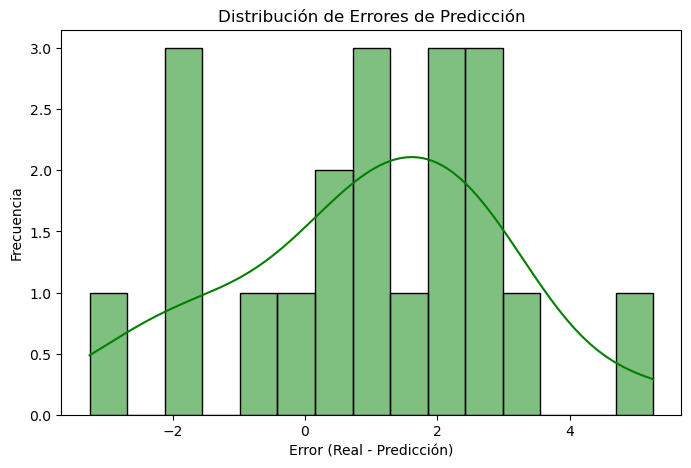

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred, bins=15, kde=True, color='green')
plt.title('Distribución de Errores de Predicción')
plt.xlabel('Error (Real - Predicción)')
plt.ylabel('Frecuencia')
plt.show()

### Interpretación de la respuesta

- **MSE/RMSE** : Cuanto más cerca de 0, mejor. Indican la precisión de la predicción.
- **MAE** : Error promedio de goles. Fácil de entender. Un MAE de 0.8 -> error de 0.8 goles por partido.
- **R2** : Cuanto explica el modelo del comportamiento real, 1 es perfecto, 0 es como adivinar 

In [6]:
import ipywidgets as widgets

def evaluar_predicciones(threshold_mae):
    calidad = "buena" if mae <= threshold_mae else "regular o mala"
    print(f"Tu modelo tiene un MAE de {mae:.2f}, considerada {calidad} (umbral definido: {threshold_mae})")
    
umbral_widget = widgets.FloatSlider(min=0.1, max=5, step=0.1, value=1.0, description='Umbral MAE:')
widgets.interactive(evaluar_predicciones, threshold_mae=umbral_widget)

interactive(children=(FloatSlider(value=1.0, description='Umbral MAE:', max=5.0, min=0.1), Output()), _dom_cla…